## Fetal Health Classification

#### Importing Libraries

In [1]:
#Libraries for Wrangling
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [122]:
#Libraries for building and Validating model
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [151]:
# check version number
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn import svm

In [185]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix,classification_report

In [36]:
import random

#### Importing Dataset

In [5]:
raw_data = pd.read_csv('fetal_health.csv')

In [6]:
#Summarising Dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
raw_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### EDA

In [8]:
df = raw_data
df['fetal_health'] = df['fetal_health'].astype(int)

In [9]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2


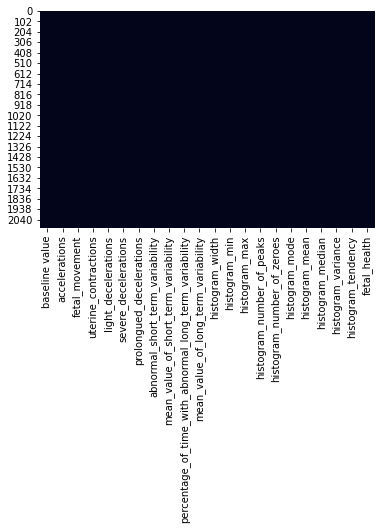

In [10]:
#Checking for missingness
sns.heatmap(df.isnull(), cbar=False)

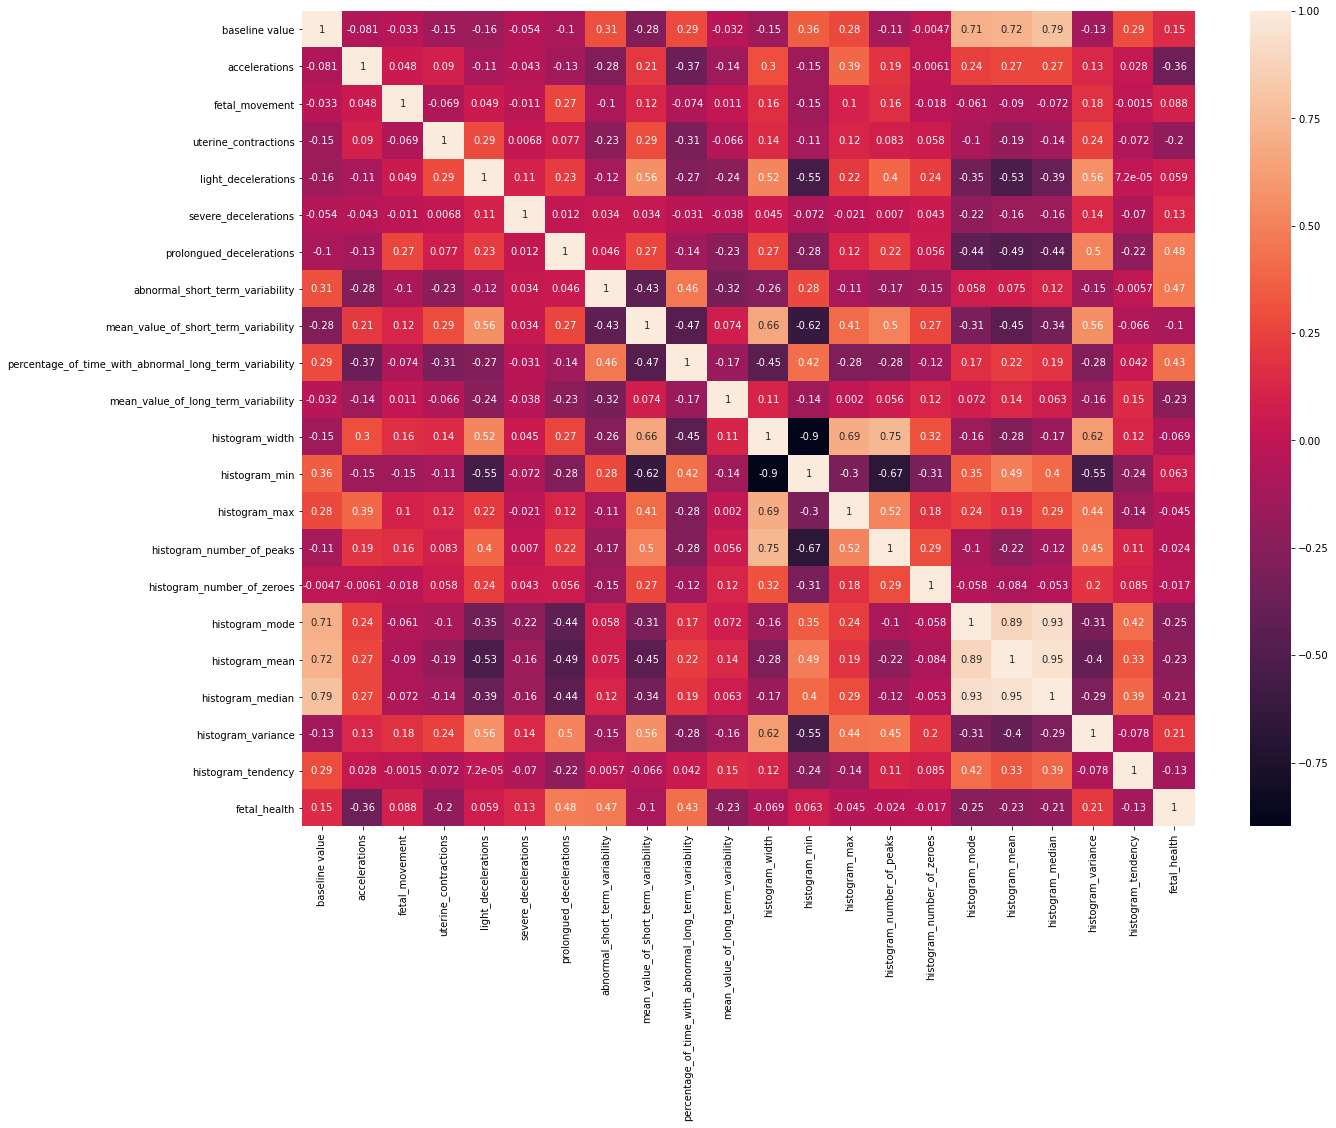

In [11]:
#Plot to show the correlation between all variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)


In [72]:
#Visulaizing the Target class distribution

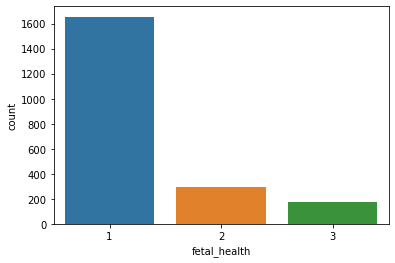

In [71]:
sns.countplot(df['fetal_health'])

### Preprocessing

#### Since there is a huge class imbalance, we need to perform over sampling rather than under sampling. 

In [13]:
x = df.drop('fetal_health', axis= 1)
y = df['fetal_health']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
y_train.shape

(1488,)

In [175]:
y_test.shape

(638,)

In [17]:
class_count_1, class_count_2,class_count_3 = y_train.value_counts()

In [73]:
# Target class before sampling
y_train.value_counts()

1    1165
2     199
3     124
Name: fetal_health, dtype: int64

#### Random Over Sampling

In [19]:
ros = RandomOverSampler(random_state=2)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [74]:
# target class after Random over sampling
Counter(y_res)

Counter({1: 1165, 2: 1165, 3: 1165})

#### SMOTE

In [110]:
sm = SMOTE(random_state=42)
X_resS, y_resS = sm.fit_resample(X_train, y_train)

In [111]:
# target class after SMOTE
print('Resampled dataset shape %s' % Counter(y_resS))

Resampled dataset shape Counter({1: 1165, 2: 1165, 3: 1165})


### Model Building

#### Decision Tree 

In [198]:
dtreg = DecisionTreeClassifier()

In [199]:
# Without sampling

In [200]:
dtregns = dtreg.fit(X_train,y_train)
y_predns = dtregns.predict(X_test)

In [201]:
confusion_matrix(y_test, y_predns,labels=[1,2,3])

array([[473,  15,   2],
       [ 28,  64,   4],
       [  1,   3,  48]], dtype=int64)

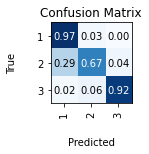

In [204]:
plotConfusionMatrix(y_test,y_predns,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [205]:
print(classification_report(y_test,y_predns))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95       490
           2       0.78      0.67      0.72        96
           3       0.89      0.92      0.91        52

    accuracy                           0.92       638
   macro avg       0.87      0.85      0.86       638
weighted avg       0.91      0.92      0.91       638



In [206]:
# With Over sampling

In [207]:
dtregos = dtreg.fit(X_res,y_res)
y_predos = dtregos.predict(X_test)

In [208]:
confusion_matrix(y_test, y_predos,labels=[1,2,3])

array([[473,  15,   2],
       [ 28,  65,   3],
       [  2,   2,  48]], dtype=int64)

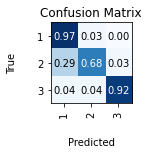

In [210]:
plotConfusionMatrix(y_test,y_predos,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [209]:
print(classification_report(y_test,y_predos))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95       490
           2       0.79      0.68      0.73        96
           3       0.91      0.92      0.91        52

    accuracy                           0.92       638
   macro avg       0.88      0.86      0.87       638
weighted avg       0.92      0.92      0.92       638



In [129]:
# With SMOTE

In [211]:
dtregosS = dtreg.fit(X_resS,y_resS)
y_predosS = dtregosS.predict(X_test)

In [214]:
confusion_matrix(y_test, y_predosS,labels=[1,2,3])

array([[467,  20,   3],
       [ 21,  68,   7],
       [  1,   2,  49]], dtype=int64)

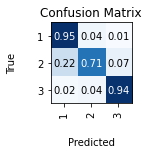

In [215]:
plotConfusionMatrix(y_test,y_predosS,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [216]:
print(classification_report(y_test,y_predosS))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95       490
           2       0.76      0.71      0.73        96
           3       0.83      0.94      0.88        52

    accuracy                           0.92       638
   macro avg       0.85      0.87      0.86       638
weighted avg       0.91      0.92      0.91       638



In [132]:
#Visualizing the Predicted with Sampling and without sampling

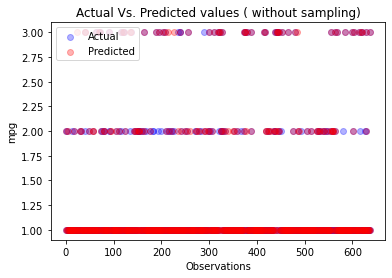

In [217]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predns.size), y=y_predns, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual Vs. Predicted values ( without sampling)')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

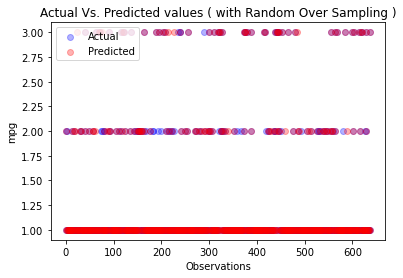

In [218]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predos.size), y=y_predos, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual Vs. Predicted values ( with Random Over Sampling )')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

### Random Forest

In [220]:
rfc = RandomForestClassifier(random_state=2)

In [221]:
# Without sampling

In [222]:
rfcns = regr.fit(X_train,y_train)
y_predrfns = rfcns.predict(X_test)

In [223]:
confusion_matrix(y_test, y_predrfns,labels=[1,2,3])

array([[486,   4,   0],
       [ 29,  64,   3],
       [  2,   6,  44]], dtype=int64)

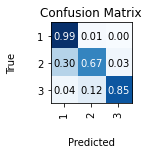

In [224]:
plotConfusionMatrix(y_test,y_predrfns,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [225]:
print(classification_report(y_test,y_predrfns))

              precision    recall  f1-score   support

           1       0.94      0.99      0.97       490
           2       0.86      0.67      0.75        96
           3       0.94      0.85      0.89        52

    accuracy                           0.93       638
   macro avg       0.91      0.83      0.87       638
weighted avg       0.93      0.93      0.93       638



In [226]:
# With Random Over sampling

In [227]:
rfros = regr.fit(X_res,y_res)
y_predrfos = rfros.predict(X_test)

In [228]:
confusion_matrix(y_test, y_predrfos,labels=[1,2,3])

array([[483,   7,   0],
       [ 22,  71,   3],
       [  1,   4,  47]], dtype=int64)

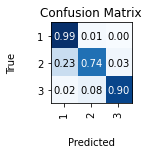

In [229]:
plotConfusionMatrix(y_test,y_predrfos,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [230]:
print(classification_report(y_test,y_predrfos))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       490
           2       0.87      0.74      0.80        96
           3       0.94      0.90      0.92        52

    accuracy                           0.94       638
   macro avg       0.92      0.88      0.90       638
weighted avg       0.94      0.94      0.94       638



In [231]:
# With SMOTE

In [232]:
rfosS = regr.fit(X_resS,y_resS)
y_predrfosS = rfosS.predict(X_test)

In [233]:
confusion_matrix(y_test, y_predrfosS,labels=[1,2,3])

array([[483,   7,   0],
       [ 21,  68,   7],
       [  0,   3,  49]], dtype=int64)

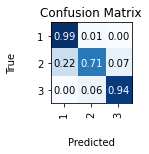

In [234]:
plotConfusionMatrix(y_test,y_predrfosS,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [235]:
print(classification_report(y_test,y_predrfosS))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       490
           2       0.87      0.71      0.78        96
           3       0.88      0.94      0.91        52

    accuracy                           0.94       638
   macro avg       0.90      0.88      0.89       638
weighted avg       0.94      0.94      0.94       638



In [148]:
#Visualizing the Predicted with Sampling and without sampling

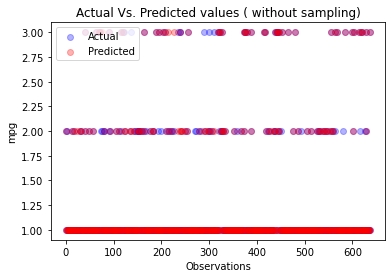

In [236]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predrfns.size), y=y_predrfns, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual Vs. Predicted values ( without sampling)')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

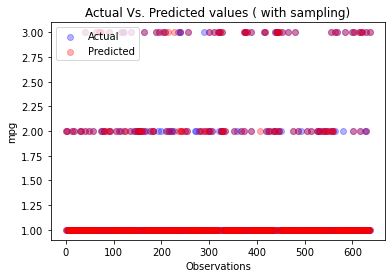

In [237]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predrfos.size), y=y_predrfos, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual Vs. Predicted values ( with sampling)')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

### SVM

In [238]:
clf = svm.SVC()

In [239]:
# Without sampling

In [246]:
svmns = clf.fit(X_train,y_train)
y_predsvmns = svmns.predict(X_test)

In [247]:
confusion_matrix(y_test, y_predsvmns,labels=[1,2,3])

array([[476,  12,   2],
       [ 58,  36,   2],
       [  8,  18,  26]], dtype=int64)

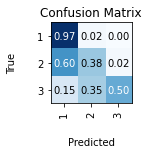

In [248]:
plotConfusionMatrix(y_test,y_predsvmns,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [249]:
print(classification_report(y_test,y_predsvmns))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92       490
           2       0.55      0.38      0.44        96
           3       0.87      0.50      0.63        52

    accuracy                           0.84       638
   macro avg       0.76      0.62      0.67       638
weighted avg       0.83      0.84      0.83       638



In [ ]:
# With Random Over sampling

In [250]:
svmos = clf.fit(X_res,y_res)
y_predsvmos = svmos.predict(X_test)

In [253]:
confusion_matrix(y_test, y_predsvmos,labels=[1,2,3])

array([[413,  56,  21],
       [ 14,  76,   6],
       [  1,   6,  45]], dtype=int64)

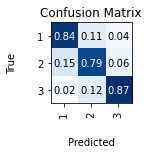

In [254]:
plotConfusionMatrix(y_test,y_predsvmos,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [256]:
print(classification_report(y_test,y_predsvmos))

              precision    recall  f1-score   support

           1       0.96      0.84      0.90       490
           2       0.55      0.79      0.65        96
           3       0.62      0.87      0.73        52

    accuracy                           0.84       638
   macro avg       0.71      0.83      0.76       638
weighted avg       0.87      0.84      0.85       638



In [ ]:
# With SMOTE

In [257]:
svmosS = clf.fit(X_resS,y_resS)
y_predsvmosS = svmosS.predict(X_test)

In [258]:
confusion_matrix(y_test, y_predsvmosS,labels=[1,2,3])

array([[409,  62,  19],
       [ 12,  77,   7],
       [  2,   6,  44]], dtype=int64)

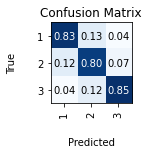

In [259]:
plotConfusionMatrix(y_test,y_predsvmosS,classes = np.array(['1','2','3']),cmap = plt.cm.Blues)

In [260]:
print(classification_report(y_test,y_predsvmosS))

              precision    recall  f1-score   support

           1       0.97      0.83      0.90       490
           2       0.53      0.80      0.64        96
           3       0.63      0.85      0.72        52

    accuracy                           0.83       638
   macro avg       0.71      0.83      0.75       638
weighted avg       0.87      0.83      0.84       638



#### <i> Thus, on analyzin all the three models with different sampling techniques, we conclude that Random Forest Classifier with SMOTE preprocessing technique performs better and has high recall value which is necessary in medical related data.</i>

##### Correlation Matrix Plot - User defined Function

In [182]:
def plotConfusionMatrix(dtrue,dpred,classes,title = 'Confusion Matrix',\
                        width = 0.75,cmap = plt.cm.Blues):
  
    cm = confusion_matrix(dtrue,dpred)
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]

    fig,ax = plt.subplots(figsize = (np.shape(classes)[0] * width,\
                                       np.shape(classes)[0] * width))
    im = ax.imshow(cm,interpolation = 'nearest',cmap = cmap)

    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           aspect = 'equal')
    
    ax.set_ylabel('True',labelpad = 20)
    ax.set_xlabel('Predicted',labelpad = 20)

    plt.setp(ax.get_xticklabels(),rotation = 90,ha = 'right',
             va = 'center',rotation_mode = 'anchor')

    fmt = '.2f'

    thresh = cm.max() / 2.0

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,format(cm[i,j],fmt),ha = 'center',va = 'center',
                    color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.show()